In [1]:
# --- (6) Applying Classification Models to Images --- #
# Dataset from https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
# --- Representing Images as Matrices --- #
# This video provided background but did not have a code demo piece

# Notes: 
# Grayscale is considered a single channel image (0.0 - 1.0 intensity) while RGB would be a 3 channel image (R,G,B)
# Each channel can take 0 - 255
# Whether gray or color, it can be represented by a 3D matrix (n_cols, n_rows, n_channels)
# If you were to have a list of images (of same size), it becomes a 4D matrix (n_images, n_cols, n_rows, n_channels)

In [ ]:
# --- Exploring the Fashion MNIST Dataset --- #

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [3]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist/train.csv')

In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
# Use just a fraction of the dataset because it can take hours to train otherwise
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [6]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,13,12,15,2,...,56,53,4,16,14,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,67,53,24,0,0,0,0,0,0,0
2,6,0,0,0,0,0,1,0,0,0,...,0,71,42,34,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,37,41,13,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# The label column corresponds to the fashion item represented in the image that we can map using this lookup
LOOKUP = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [8]:
# Helper funtion that prints the label (fashion item type) and displays the image
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    # Reshape 1D features (pixels) array into 28x28 image
    plt.imshow(features.reshape(28, 28))

In [9]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [10]:
# Features correponding to pixels
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,13,12,15,2,48,...,56,53,4,16,14,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,155,...,67,53,24,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,71,42,34,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,37,41,13,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Labels corresponding to fashion item type
Y.head()

0    1
1    4
2    6
3    0
4    5
Name: label, dtype: int64

In [12]:
# First 100 pixels of the image at index 5
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# The label of that image
Y.loc[5]

5

Actual label:  Sandal


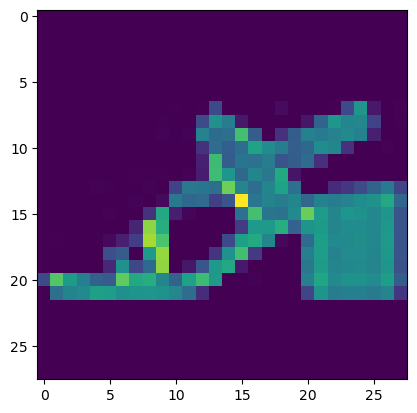

In [14]:
# The image
# Note it's a grayscale image but pyplot applies some default color scheme
display_image(X.loc[5].values, Y.loc[5])

In [15]:
# Scale the features so that we have intensity values between 0 and 1
# Otherwise by default the grayscale image is represented with pixel intensities ranging from 0 - 255
X = X / 255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.050980,0.047059,0.058824,0.007843,0.188235,...,0.219608,0.207843,0.015686,0.062745,0.054902,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.607843,...,0.262745,0.207843,0.094118,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.278431,0.164706,0.133333,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.145098,0.160784,0.050980,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# --- Classifying Images Using Logistic Regression --- #
"""
Note: We are working with simple grayscale images, enabling use of logistic regression.
More complex colored images will require a more complex implementation using something like neural networks.
"""

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [18]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [19]:
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    # Note the difference between this and previous implementations of summarize_classification
    # average='weighted' is required for multi-class classification (vs prior binary classification)
    # Without averaging, we would get precision and recall for each label rather than the overall model
    # The weight used in the averaging for each label is determined by the number of true instances of each label
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    
    print("Test data count: ", len(y_test))
    print("accuracy_count: ", num_acc)
    print("accuracy_score: ", acc)
    print("precision_score: ", prec)
    print("recall_score: ", recall)
    print()

In [20]:
# Note solver='sag' is an optimization algorithm to handle multinominal loss for multiclass classifications
# It converges faster for large datasets
# Vs 'liblinear' that uses one-versus-rest scheme and is preferred for binary classification on smaller datasets
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [21]:
y_pred = logistic_model.predict(x_test)

y_pred

array([0, 8, 7, ..., 7, 9, 3])

In [23]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count:  3038
accuracy_score:  0.8438888888888889
precision_score:  0.84200414273652
recall_score:  0.8438888888888889

